In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


In [2]:
!pip install scikit-learn==1.4.2


In [3]:
df=pd.read_csv('Housing_Synthetic.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000.0,7420.0,4.0,2.0,3.0,yes,no,no,no,yes,2.0,yes,furnished
1,12250000.0,8960.0,4.0,4.0,4.0,yes,no,no,no,yes,3.0,no,furnished
2,12250000.0,9960.0,3.0,2.0,2.0,yes,no,yes,no,no,2.0,yes,semi-furnished
3,12215000.0,7500.0,4.0,2.0,2.0,yes,no,yes,no,yes,3.0,yes,furnished
4,11410000.0,7420.0,4.0,1.0,2.0,yes,yes,yes,no,yes,2.0,no,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             742 non-null    float64
 1   area              743 non-null    float64
 2   bedrooms          736 non-null    float64
 3   bathrooms         740 non-null    float64
 4   stories           742 non-null    float64
 5   mainroad          741 non-null    object 
 6   guestroom         742 non-null    object 
 7   basement          744 non-null    object 
 8   hotwaterheating   744 non-null    object 
 9   airconditioning   744 non-null    object 
 10  parking           742 non-null    float64
 11  prefarea          744 non-null    object 
 12  furnishingstatus  744 non-null    object 
dtypes: float64(6), object(7)
memory usage: 75.8+ KB


In [5]:
num_features=[feature for feature in df.columns if df[feature].dtype!='O']
print(num_features)
print(len(num_features))

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
6


In [6]:
cat_features=[feature for feature in df.columns if df[feature].dtype=='O']
print(cat_features)
print(len(cat_features))

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
7


In [7]:
df.isnull().sum()

price               3
area                2
bedrooms            9
bathrooms           5
stories             3
mainroad            4
guestroom           3
basement            1
hotwaterheating     1
airconditioning     1
parking             3
prefarea            1
furnishingstatus    1
dtype: int64

In [8]:
for col in df.columns:
    print(df[col].value_counts())

price
3.500000e+06    17
4.200000e+06    17
4.900000e+06    12
3.640000e+06     9
3.150000e+06     9
                ..
2.310000e+06     1
2.345000e+06     1
2.408000e+06     1
2.604000e+06     1
4.836151e+06     1
Name: count, Length: 418, dtype: int64
area
6000.000000    24
4500.000000    13
3000.000000    13
4000.000000    11
6600.000000     9
               ..
3350.000000     1
2176.000000     1
2015.000000     1
7152.000000     1
4284.218812     1
Name: count, Length: 484, dtype: int64
bedrooms
3.0    331
2.0    164
4.0    142
5.0     37
6.0     32
1.0     30
Name: count, dtype: int64
bathrooms
1.0    439
2.0    186
3.0     58
4.0     57
Name: count, dtype: int64
stories
2.0    293
1.0    273
4.0     89
3.0     87
Name: count, dtype: int64
mainroad
yes    642
no      99
Name: count, dtype: int64
guestroom
no     615
yes    127
Name: count, dtype: int64
basement
no     486
yes    258
Name: count, dtype: int64
hotwaterheating
no     707
yes     37
Name: count, dtype: int64
aircondit

In [9]:
feautres_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in feautres_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,2),'% missing values')

price 0.4 % missing values
area 0.27 % missing values
bedrooms 1.21 % missing values
bathrooms 0.67 % missing values
stories 0.4 % missing values
mainroad 0.54 % missing values
guestroom 0.4 % missing values
basement 0.13 % missing values
hotwaterheating 0.13 % missing values
airconditioning 0.13 % missing values
parking 0.4 % missing values
prefarea 0.13 % missing values
furnishingstatus 0.13 % missing values


In [10]:
num_null_features=df[feautres_with_na].select_dtypes(exclude='object').describe()
print(num_null_features)

              price          area    bedrooms   bathrooms     stories  \
count  7.420000e+02    743.000000  736.000000  740.000000  742.000000   
mean   4.800611e+06   5168.280397    3.119565    1.639189    1.989218   
std    1.865709e+06   2173.258222    1.076324    0.922331    0.982927   
min    4.731728e+05    249.530316    1.000000    1.000000    1.000000   
25%    3.497620e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.480000e+06   4800.000000    3.000000    1.000000    2.000000   
75%    5.950000e+06   6420.000000    4.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  742.000000  
mean     0.921833  
std      1.001663  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      3.000000  


In [11]:
for feature in num_null_features:
    df[feature].fillna(df[feature].median(),inplace=True)

C:\Users\Samyak\AppData\Local\Temp\ipykernel_18540\2724783520.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna(df[feature].median(),inplace=True)


In [12]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            4
guestroom           3
basement            1
hotwaterheating     1
airconditioning     1
parking             0
prefarea            1
furnishingstatus    1
dtype: int64

In [13]:
remaining_feautres_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
print(remaining_feautres_with_na)

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [14]:
for feature in remaining_feautres_with_na:
    df[feature].fillna(df[feature].mode()[0],inplace=True)

C:\Users\Samyak\AppData\Local\Temp\ipykernel_18540\1523251717.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna(df[feature].mode()[0],inplace=True)


In [15]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [16]:

skewness = df['price'].skew()
print(skewness)

##Skewnwness in the range 0.5-1 indicates moderately right skewed

0.8705824964276685


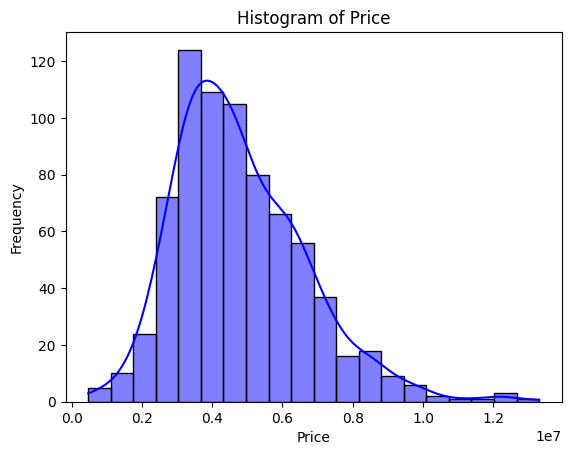

In [17]:

sns.histplot(df['price'], kde=True, bins=20, color='blue')
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [18]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(outliers)


            price          area  bedrooms  bathrooms  stories mainroad  \
0    1.330000e+07   7420.000000       4.0        2.0      3.0      yes   
1    1.225000e+07   8960.000000       4.0        4.0      4.0      yes   
2    1.225000e+07   9960.000000       3.0        2.0      2.0      yes   
3    1.221500e+07   7500.000000       4.0        2.0      2.0      yes   
4    1.141000e+07   7420.000000       4.0        1.0      2.0      yes   
5    1.085000e+07   7500.000000       3.0        3.0      1.0      yes   
6    1.015000e+07   8580.000000       4.0        3.0      4.0      yes   
7    1.015000e+07  16200.000000       5.0        3.0      2.0      yes   
8    9.870000e+06   8100.000000       4.0        1.0      2.0      yes   
9    9.800000e+06   5750.000000       3.0        2.0      4.0      yes   
10   9.800000e+06  13200.000000       3.0        1.0      2.0      yes   
11   9.681000e+06   6000.000000       4.0        3.0      2.0      yes   
601  9.766064e+06   8432.807602       

In [19]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000.0,7420.0,4.0,2.0,3.0,yes,no,no,no,yes,2.0,yes,furnished
1,12250000.0,8960.0,4.0,4.0,4.0,yes,no,no,no,yes,3.0,no,furnished
2,12250000.0,9960.0,3.0,2.0,2.0,yes,no,yes,no,no,2.0,yes,semi-furnished
3,12215000.0,7500.0,4.0,2.0,2.0,yes,no,yes,no,yes,3.0,yes,furnished
4,11410000.0,7420.0,4.0,1.0,2.0,yes,yes,yes,no,yes,2.0,no,furnished


In [20]:
X = df.iloc[:, 1:]  


In [21]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420.000000,4.0,2.0,3.0,yes,no,no,no,yes,2.0,yes,furnished
1,8960.000000,4.0,4.0,4.0,yes,no,no,no,yes,3.0,no,furnished
2,9960.000000,3.0,2.0,2.0,yes,no,yes,no,no,2.0,yes,semi-furnished
3,7500.000000,4.0,2.0,2.0,yes,no,yes,no,yes,3.0,yes,furnished
4,7420.000000,4.0,1.0,2.0,yes,yes,yes,no,yes,2.0,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
740,5610.478551,2.0,3.0,4.0,no,no,no,no,yes,0.0,no,semi-furnished
741,1796.743308,6.0,4.0,1.0,yes,yes,yes,no,yes,0.0,yes,unfurnished
742,10676.108206,4.0,1.0,3.0,yes,no,no,no,no,1.0,yes,semi-furnished
743,6119.321229,6.0,1.0,3.0,yes,no,no,yes,yes,1.0,no,semi-furnished


In [22]:
y=df['price']

In [23]:
y

0      1.330000e+07
1      1.225000e+07
2      1.225000e+07
3      1.221500e+07
4      1.141000e+07
           ...     
740    1.426453e+06
741    1.969595e+06
742    4.292481e+06
743    4.353902e+06
744    4.836151e+06
Name: price, Length: 745, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape

(596, 12)

In [25]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
44,6000.000000,4.0,2.0,4.0,yes,no,no,no,yes,1.0,no,furnished
70,4000.000000,3.0,2.0,2.0,yes,no,yes,no,yes,0.0,yes,semi-furnished
164,6710.000000,3.0,2.0,2.0,yes,yes,yes,no,no,1.0,yes,furnished
680,4074.591216,5.0,3.0,2.0,yes,no,no,no,no,3.0,no,unfurnished
265,2880.000000,3.0,1.0,2.0,yes,no,no,no,no,0.0,yes,semi-furnished


In [26]:
cat_features=X.select_dtypes(include='object').columns
num_features=X.select_dtypes(exclude='object').columns

In [27]:
num_features

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

In [28]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
cat_transformer=OneHotEncoder(drop='first')

preprocessor=ColumnTransformer(
    [
        ('OneHotEncoder',cat_transformer,cat_features),
        ('StandardScaler',numeric_transformer,num_features)
    ]
)

In [29]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [30]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.371666,0.798912,0.396587,2.013540,0.062941
1,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,-0.549546,-0.115006,0.396587,0.001688,-0.924241
2,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.698696,-0.115006,0.396587,0.001688,0.062941
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.515189,1.712830,1.490875,0.001688,2.037306
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-1.065425,-0.115006,-0.697700,0.001688,-0.924241
...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.371666,0.798912,0.396587,2.013540,-0.924241
592,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.118333,0.798912,0.396587,-1.004238,-0.924241
593,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.319243,-0.115006,0.396587,1.007614,0.062941
594,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.531122,-1.028925,-0.697700,-1.004238,-0.924241


In [31]:
##MODEL SELECTION
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    
    model_train_mse = mean_squared_error(y_train, y_train_pred)
    model_train_mae = mean_absolute_error(y_train, y_train_pred)
    model_train_r2score = r2_score(y_train, y_train_pred)

    model_test_mse = mean_squared_error(y_test, y_test_pred)
    model_test_mae = mean_absolute_error(y_test, y_test_pred)
    model_test_r2score = r2_score(y_test, y_test_pred)

    print(name)
    print('Model performance for Training Set')
    print(f'- MSE: {model_train_mse:.4f}')
    print(f'- MAE: {model_train_mae:.4f}')
    print(f'- R2 Score: {model_train_r2score:.4f}')
    print('------------------------')
    print('Model performance for Testing Set')
    print(f'- MSE: {model_test_mse:.4f}')
    print(f'- MAE: {model_test_mae:.4f}')
    print(f'- R2 Score: {model_test_r2score:.4f}')
    print('=========================')


Linear Regression
Model performance for Training Set
- MSE: 2190418017981.0981
- MAE: 1088414.8588
- R2 Score: 0.3781
------------------------
Model performance for Testing Set
- MSE: 1941506663296.2349
- MAE: 994877.9755
- R2 Score: 0.3916
Decision Tree
Model performance for Training Set
- MSE: 2839369127.5168
- MAE: 4697.9866
- R2 Score: 0.9992
------------------------
Model performance for Testing Set
- MSE: 3368924919649.6787
- MAE: 1408380.4287
- R2 Score: -0.0558
Lasso
Model performance for Training Set
- MSE: 2190418018046.0969
- MAE: 1088414.5994
- R2 Score: 0.3781
------------------------
Model performance for Testing Set
- MSE: 1941505694476.0608
- MAE: 994878.2347
- R2 Score: 0.3916
Ridge
Model performance for Training Set
- MSE: 2190494538253.9187
- MAE: 1088008.4760
- R2 Score: 0.3781
------------------------
Model performance for Testing Set
- MSE: 1939443069053.9539
- MAE: 994806.7028
- R2 Score: 0.3922
K-Neighbors Regressor
Model performance for Training Set
- MSE: 1489

In [32]:
##Ridge Regression is the best choice because it avoids overfitting while maintaining a solid R² of 0.647 on testing.
##Lasso and Linear Regression are close, but Ridge has slightly lower error.

In [33]:
##Hyperparameter Tuning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge

ridge = Ridge()
param_grid = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [34]:
##Best Hyperparameters
grid_search.best_params_

{'alpha': 10}

In [35]:
##Training Ridge Model With Hyperparameters

ridge_best = Ridge(alpha=10)
ridge_best.fit(X_train, y_train)
y_train_pred = ridge_best.predict(X_train)
y_test_pred = ridge_best.predict(X_test)

    
model_train_mse = mean_squared_error(y_train, y_train_pred)
model_train_mae = mean_absolute_error(y_train, y_train_pred)
model_train_r2score = r2_score(y_train, y_train_pred)

model_test_mse = mean_squared_error(y_test, y_test_pred)
model_test_mae = mean_absolute_error(y_test, y_test_pred)
model_test_r2score = r2_score(y_test, y_test_pred)

print('Model performance for Training Set')
print(f'- MSE: {model_train_mse:.4f}')
print(f'- MAE: {model_train_mae:.4f}')
print(f'- R2 Score: {model_train_r2score:.4f}')
print('------------------------')
print('Model performance for Testing Set')
print(f'- MSE: {model_test_mse:.4f}')
print(f'- MAE: {model_test_mae:.4f}')
print(f'- R2 Score: {model_test_r2score:.4f}')
print('=========================')

Model performance for Training Set
- MSE: 2195435580913.7500
- MAE: 1086503.6020
- R2 Score: 0.3767
------------------------
Model performance for Testing Set
- MSE: 1929752103970.1191
- MAE: 994282.4073
- R2 Score: 0.3952


In [36]:
import pickle
pickle.dump(ridge_best,open('Ridgeregressor.pkl','wb'))
pickle.dump(preprocessor,open('preprocessor.pkl','wb'))

In [37]:
model=pickle.load(open('Ridgeregressor.pkl','rb'))
Preprocessor=pickle.load(open('preprocessor.pkl','rb'))



In [38]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.023970,-0.115006,-0.697700,1.007614,-0.924241
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.537484,-1.028925,-0.697700,-1.004238,0.062941
2,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.555909,-0.115006,-0.697700,-1.004238,0.062941
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.537484,-0.115006,-0.697700,1.007614,-0.924241
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.733789,2.626748,-0.697700,0.001688,0.062941
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,-0.205174,2.626748,2.585162,0.001688,-0.924241
145,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,-2.277036,0.798912,1.490875,1.007614,0.062941
146,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.176757,0.798912,0.396587,0.001688,1.050124
147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.717667,-1.028925,-0.697700,-1.004238,0.062941


In [39]:
# Input features (as a single row in a 2D list)
input_features = pd.DataFrame(
    [[7420, 4, 2, 3, 'yes', 'no', 'no', 'no', 'yes', 2, 'yes', 'furnished']],
   columns=['area', 'bedrooms', 'bathrooms', 'stories', 
             'mainroad', 'guestroom', 'basement', 'hotwaterheating', 
             'airconditioning', 'parking', 'prefarea', 'furnishingstatus'] # Replace with your actual column names
)

# Make predictions
preprocessed_inputs=Preprocessor.transform(input_features)


In [40]:
prediction = model.predict(preprocessed_inputs)
print(f"Prediction: {prediction}")

Prediction: [7061474.10578854]
